In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    

In [3]:
data=pd.read_excel('/home/vivek/Documents/Research_Paper/data/data.xlsx')
data.head()

,Year,Actual energy demand,GDP,Population,Export,Import,Energy Production (kt of oil eq.),Electricity power trans. and dist. Losses (kWh),Electricity Production (kWh),GDP per unit of energy use (PPP $ per kg of oil eq.),Energy imports net (% energy use),Fossil Fuel Consumption (% total),Electric Power Consumption (kWh),CO2 Emissions total (million t),Unemplyment rate (%),Diesel consumpion road (kt of oil equivalent)
0,2011,93238,1045620,4.594795e+07,186780.0,240055,34298.832,27400000000,298320000000,11.351615,73.151300,76.102673,265794000000,267.92,20.1,23590
1,2010,97576,1046894,4.514878e+07,159889.0,206116,30250.684,24445000000,291869000000,11.488947,76.317140,79.793961,262071000000,282.49,18.0,24259
2,2009,95815,1087788,4.441521e+07,189227.0,283387,30349.942,25810000000,310978000000,10.866191,78.167604,81.800550,276909000000,317.11,11.3,26343
3,2008,103274,1053161,4.374402e+07,185023.0,285038,30289.025,25481000000,301839000000,10.050764,78.941929,83.187732,273820000000,343.71,8.3,25726
4,2007,106839,985547,4.313201e+07,170438.0,262687,31338.527,25125000000,295582000000,9.440491,77.891422,82.502140,271049000000,331.86,8.5,24546


In [4]:
X=data.loc[:,['Export','Import','GDP per unit of energy use (PPP $ per kg of oil eq.)','Energy imports net (% energy use)','Electric Power Consumption (kWh)','Unemplyment rate (%)']]
#X=data.drop('Actual energy demand',1)
Y=data['Actual energy demand']
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size =0.3)

# Linear Regression

In [5]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)
lreg.score(x_train,y_train)

0.9864991829869868

In [6]:
pred_cv = lreg.predict(x_cv)

In [7]:
mse = np.mean((pred_cv - y_cv)**2)
mse

23876290.155798666

In [8]:
lreg.score(x_cv,y_cv)

0.95135312868703059

In [9]:
mean_absolute_error(pred_cv, y_cv)

2617.7717961559574

In [10]:
mean_absolute_percentage_error(pred_cv, y_cv)

2.8999850782682657

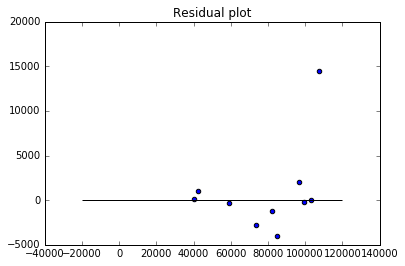

In [11]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -20000, xmax=120000)

plt.title('Residual plot')

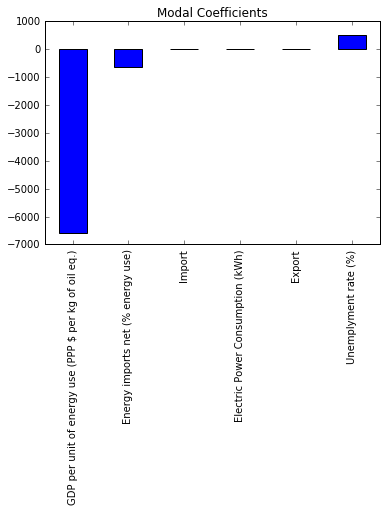

In [12]:
predictors = x_train.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# Ridge Regression

In [13]:
from sklearn.linear_model import Ridge

In [14]:
ridgeReg = Ridge(alpha=0.5, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)
mse 

135855988.64971083

In [15]:
ridgeReg.score(x_cv,y_cv)

0.72319951073581423

In [16]:
mean_absolute_error(pred, y_cv)

10343.580775988386

In [17]:
mean_absolute_percentage_error(pred, y_cv)

14.196013429744564

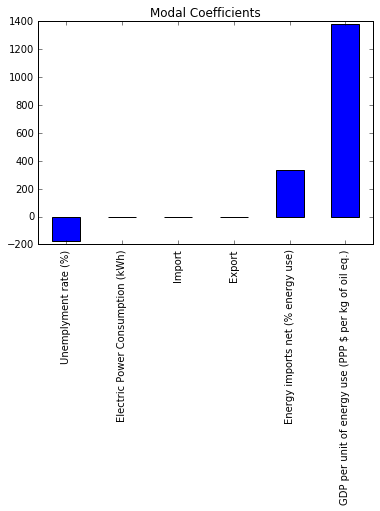

In [18]:
predictors = x_train.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(x_train,y_train)

pred1 = lassoReg.predict(x_cv)

# calculating mse

mse = np.mean((pred1 - y_cv)**2)
mse

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


23003405.080726109

In [20]:
lassoReg.score(x_cv,y_cv)

0.95313159291413541

In [21]:
mean_absolute_error(pred1, y_cv)

2632.67753217058

In [22]:
mean_absolute_percentage_error(pred1, y_cv)

2.943829916503899

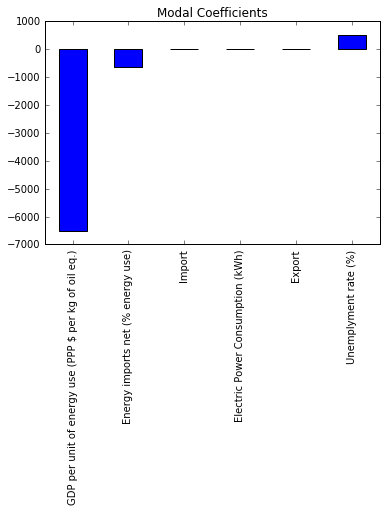

In [23]:
predictors = x_train.columns

coef1 = Series(lassoReg.coef_,predictors).sort_values()

coef1.plot(kind='bar', title='Modal Coefficients')

# ElasticNet Regression

In [24]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred2 = ENreg.predict(x_cv)

#calculating mse

mse = np.mean((pred2 - y_cv)**2)

mse

23428301.851343121

In [25]:
ENreg.score(x_cv,y_cv)

0.9522658847833233

In [26]:
mean_absolute_error(pred2, y_cv)

4097.3223127936008

In [27]:
mean_absolute_percentage_error(pred2, y_cv)

5.4882073785184469

# Support Vector Regression

In [28]:
from sklearn.svm import SVR

In [29]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(x_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
pred3 = clf.predict(x_cv)
mse=np.mean((pred3 - y_cv)**2)
mse

579211585.29999995

In [31]:
clf.score(x_cv,y_cv)

-0.1801176509922362

In [32]:
mean_absolute_error(pred3, y_cv)

22431.099999999999

In [33]:
mean_absolute_percentage_error(pred3, y_cv)

32.694583722014926